In [1]:
from arcgis.gis import GIS
from IPython.display import display
from arcgis import features
# from arcpy.sa import *  da fare sull'altro jupyter con l'altro ambiente virtuale
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#gis = GIS("https://www.arcgis.com", "Utente_E_2018", "corsoGIS21")  # accesso utente con account
gis = GIS()                                                          # accesso utente anonimo

In [3]:
map1 = gis.map("Lombardy")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [4]:
# Ricerca di dataset (da fare in modalità anonima non loggati)

#items = gis.content.search('water')
#for item in items:
#    display(item)

In [5]:
#Lettura csv
csv1 = 'resources/Stazioni_qualit__dell_aria.csv'
cities_df_1 = pd.read_csv(csv1)
cities_df_1.head()


IdSensore             NomeTipoSensore UnitaMisura  Idstazione  \
0      10179           Biossido di Azoto       µg/m³         704   
1      10177             Ossidi di Azoto       µg/m³         704   
2      10185               PM10 (SM2005)       µg/m³         704   
3      10399    Particelle sospese PM2.5       µg/m³         583   
4       6642  Particolato Totale Sospeso       µg/m³         542   

                 NomeStazione  Quota Provincia              Comune Storico  \
0  Sermide - via Dalla Chiesa   11.0        MN  Sermide e Felonica       S   
1  Sermide - via Dalla Chiesa   11.0        MN  Sermide e Felonica       S   
2  Sermide - via Dalla Chiesa   11.0        MN  Sermide e Felonica       S   
3        Bergamo - via Meucci  249.0        BG             Bergamo       N   
4                        Meda  222.0        MB                Meda       S   

    DataStart    DataStop  Utm_Nord  UTM_Est        lat        lng  \
0  29/11/2006  01/01/2017   4986023   680789  45.004614  11.294015   
1  29/11/2006  01/01/2017   4986023   680789  45.004614  11.294015   
2  01/01/2007  01/01/2017   4986023   680789  45.004614  11.294015   
3  20/12/2008         NaN   5059922   550116  45.691037   9.643651   
4  01/11/1995  04/02/1998   5056480   512203  45.661762   9.156644   

                                   location  
0  (45.004613731114105, 11.294014707706845)  
1  (45.004613731114105, 11.294014707706845)  
2  (45.004613731114105, 11.294014707706845)  
3    (45.69103740547214, 9.643650579461385)  
4    (45.66176219189168, 9.156643984551597)

In [6]:
# Create a output path for the data
outfp = "output/output.shp"

In [7]:
# Dataframe to GeoDataFrame
gdf = gpd.GeoDataFrame(
    cities_df_1, geometry=gpd.points_from_xy(cities_df_1.lng, cities_df_1.lat))

In [8]:
# Generazione shape file
gdf.to_file(outfp)

In [9]:
# Lettura shape file
fp = "output/output.shp"
data = gpd.read_file(fp)

In [10]:
type(data)
print(data.head(2))

   IdSensore         NomeTipoSe UnitaMisur  Idstazione  \
0      10179  Biossido di Azoto      µg/m³         704   
1      10177    Ossidi di Azoto      µg/m³         704   

                   NomeStazio  Quota Provincia              Comune Storico  \
0  Sermide - via Dalla Chiesa   11.0        MN  Sermide e Felonica       S   
1  Sermide - via Dalla Chiesa   11.0        MN  Sermide e Felonica       S   

    DataStart    DataStop  Utm_Nord  UTM_Est        lat        lng  \
0  29/11/2006  01/01/2017   4986023   680789  45.004614  11.294015   
1  29/11/2006  01/01/2017   4986023   680789  45.004614  11.294015   

                                   location                   geometry  
0  (45.004613731114105, 11.294014707706845)  POINT (11.29401 45.00461)  
1  (45.004613731114105, 11.294014707706845)  POINT (11.29401 45.00461)  


In [11]:
shape = gpd.read_file('resources/regione/regione_2015.shp')
shape.to_crs(epsg=4326, inplace=True)

<AxesSubplot:>

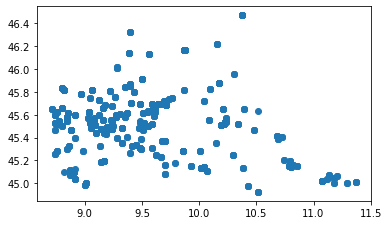

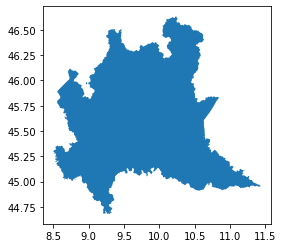

In [12]:
%matplotlib inline
data.plot()
shape.plot()

<AxesSubplot:title={'center':'Posizione sensori Lombardia'}, xlabel='Longitude', ylabel='Latitude'>

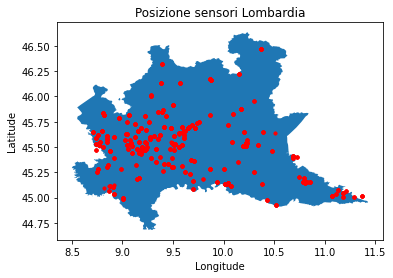

In [13]:
ax = shape.plot()
plt.title('Posizione sensori Lombardia')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
data.plot(ax=ax, color='red',markersize=10)